In [0]:
import matplotlib.pyplot as plt
import pyspark.sql

In [0]:
Num_songs_year = spark.sql("""
    SELECT
    year,
    count(artist_name) AS num_songs
    FROM
    prepared_songs_data
    WHERE
    year > 0
    GROUP BY
    year
    ORDER BY
    year DESC
""").toPandas()

Num_songs_year

,year,num_songs
0,2010,1372
1,2009,3676
2,2008,4132
3,2007,5052
4,2006,4964
...,...,...
69,1931,8
70,1930,4
71,1929,12
72,1928,8


In [0]:
# Proper error handling
row = Num_songs_year.count()[1]
if row>0:
    print(f"Data validation passed. {row} rows available.")
else:
    print("No data queried")

Data validation passed. 74 rows available.


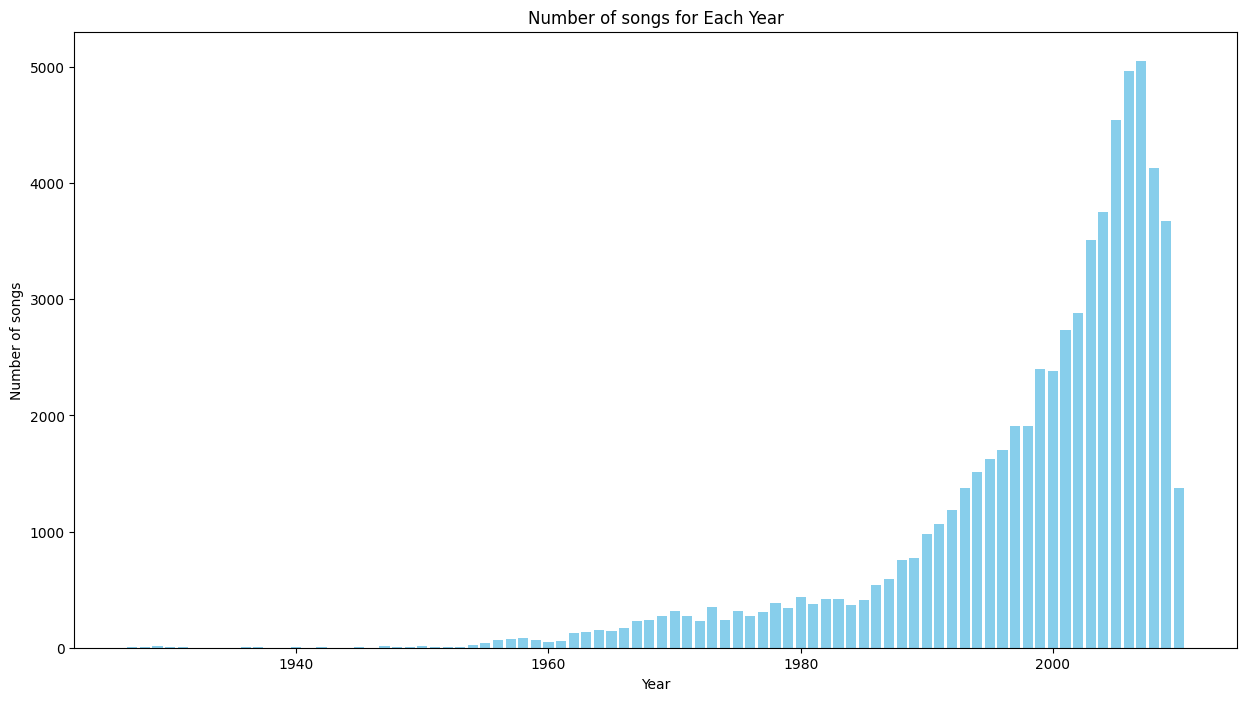

In [0]:
plt.figure(figsize=(15, 8))
plt.bar(Num_songs_year["year"], Num_songs_year["num_songs"], color='skyblue')
plt.title("Number of songs for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.show()

In [0]:
top_artists = spark.sql(
    """
    SELECT
    artist_name,
    count(artist_name)
    AS
    num_songs,
    year
    FROM
    prepared_songs_data
    WHERE
    year > 0
    GROUP BY
    artist_name,
    year
    ORDER BY
    num_songs DESC,
    year DESC
    LIMIT 10
"""
)

top_artists

DataFrame[artist_name: string, num_songs: bigint, year: int]

In [0]:
top_DJ = spark.sql(
    """
    SELECT
    artist_name,
    title,
    tempo
    FROM
    prepared_songs_data
    WHERE
    time_signature = 4
    AND
    tempo between 100 and 140
    ORDER BY tempo DESC
    LIMIT 10
"""
)

In [0]:
top_artists_pandas = top_artists.toPandas() 
top_DJ_pandas = top_DJ.toPandas()

                           artist_name  num_songs  year
0                         Beastie Boys         20  1994
1                              Roebeck         16  2010
2                         Darla Farmer         16  2009
3                          Maximo Park         16  2009
4                        Calvin Harris         16  2007
5  Low Low Low La La La Love Love Love         16  2007
6                       Lucky Fonz III         16  2007
7                              Shinobu         16  2006
8                         Susana Félix         16  2006
9             Ordo Rosarius Equilibrio         16  2006
                               artist_name  ...  tempo
0                             Axel Fischer  ...  140.0
1                               Status Quo  ...  140.0
2  Senseless Eccentric Cabaret feat. Cyfer  ...  140.0
3  Senseless Eccentric Cabaret feat. Cyfer  ...  140.0
4  Senseless Eccentric Cabaret feat. Cyfer  ...  140.0
5                               Status Quo  ...  140.0

In [0]:
top_artists_pandas

,artist_name,num_songs,year
0,Beastie Boys,20,1994
1,Roebeck,16,2010
2,Darla Farmer,16,2009
3,Maximo Park,16,2009
4,Calvin Harris,16,2007
5,Low Low Low La La La Love Love Love,16,2007
6,Lucky Fonz III,16,2007
7,Shinobu,16,2006
8,Susana Félix,16,2006
9,Ordo Rosarius Equilibrio,16,2006


In [0]:
top_DJ_pandas

,artist_name,title,tempo
0,Axel Fischer,Du Trägst Keine Liebe In Dir (Party Version),140.0
1,Status Quo,Another Shipwreck,140.0
2,Senseless Eccentric Cabaret feat. Cyfer,Wir sind es wert (Factory Mix),140.0
3,Senseless Eccentric Cabaret feat. Cyfer,Wir sind es wert (Factory Mix),140.0
4,Senseless Eccentric Cabaret feat. Cyfer,Wir sind es wert (Factory Mix),140.0
5,Status Quo,Another Shipwreck,140.0
6,Axel Fischer,Du Trägst Keine Liebe In Dir (Party Version),140.0
7,Axel Fischer,Du Trägst Keine Liebe In Dir (Party Version),140.0
8,Axel Fischer,Du Trägst Keine Liebe In Dir (Party Version),140.0
9,Senseless Eccentric Cabaret feat. Cyfer,Wir sind es wert (Factory Mix),140.0
